# [1] Sequential

In [58]:
# 모듈 불러오기
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 데이터 로드 및 확인

max_features = int(input('최대 단어 수 설정: ')) # 어휘 집합 수 설정

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(f"훈련 데이터: {X_train.shape}, 훈련 라벨: {y_train.shape}")
print(f"테스트 데이터: {y_train.shape}, 테스트 라벨: {y_test.shape}")
print()
print("훈련 데이터 샘플 확인")
print(X_train[0]) # 단어 인덱스 확인
print()

def check_len(m, sentences):
    cnt = 0
    for sent in sentences:
        if len(sent) <= m:
            cnt += 1
    
    return f'전체 문장 중 길이가 {m} 이하인 샘플의 비율: {(cnt/len(sentences))*100}'

# 문장 길이 설정: 패딩
for length in range(100, 1000, 50):
    print(check_len(length, X_train))
print()

# 파라미터 설정
max_length = int(input('문장 길이 설정: '))

# IMDB 데이터셋 문장 decode
def decode_sent(sentences):
    '''
    - 0: padding, 1: start, 2: OOV
    - 실제 word index에서 3을 빼고, 없으면 '*'로 채운다.
    '''
    temp_sent = []
    for sent in sentences:
        temp = vocab_dict.get(sent-3, '*')
        temp_sent.append(temp)
    
    comb_sent = " ".join(temp_sent)

    return comb_sent

# 원래 문장 어떤 상태였는지 확인
print(decode_sent(X_train[0])) # 문장 앞에 '*' 붙는다.
print()

# 패딩
X_train = pad_sequences(X_train, maxlen=max_length) # truncate 되는 건가?
X_test = pad_sequences(X_test, maxlen=max_length)
print("========== 패딩 후 ==========")
print(f"훈련 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")
print()

# OOV 확인
for i in range(10):
    print(f"{i}번째 문장에서 OOV 개수: {(X_train[i] == 2).sum()}")
print()

# 네트워크 파라미터
BATCH = int(input('배치 사이즈 설정: '))
n_embed = int(input('임베딩 차원 설정: '))
n_hidden = int(input('은닉 노드 수 설정: '))
EPOCHS = int(input('학습 횟수 설정: '))

# 모델 레이어 설정 및 구성
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=n_embed, input_length=max_length))
model.add(Bidirectional(LSTM(n_hidden)))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002))
print("========== 모델 전체 구조 확인 ==========")
print(model.summary())
print()

# 모델 훈련
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

hist = model.fit(X_train, y_train,
                 batch_size=BATCH,
                 epochs=EPOCHS,
                 validation_data=(X_test, y_test),
                 callbacks=[es])

# 예측
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

최대 단어 수 설정: 6000
훈련 데이터: (25000,), 훈련 라벨: (25000,)
테스트 데이터: (25000,), 테스트 라벨: (25000,)

훈련 데이터 샘플 확인
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113

# [2] Functional API

- 희귀 단어 등장 빈도 확인하는 부분을 추가해 보자.

> For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

- 문장 길이 확인하는 부분을 추가해서 문장 길이 설정 다시 해 주자.

In [54]:
# 모듈 불러오기
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [25]:
# 데이터 로드 및 확인

max_features = int(input('최대 단어 수 설정: ')) # 어휘 집합 수 설정

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(f"훈련 데이터: {X_train.shape}, 훈련 라벨: {y_train.shape}")
print(f"테스트 데이터: {y_train.shape}, 테스트 라벨: {y_test.shape}")
print()
print("훈련 데이터 샘플 확인")
print(X_train[0]) # 단어 인덱스 확인

최대 단어 수 설정: 6000
훈련 데이터: (25000,), 훈련 라벨: (25000,)
테스트 데이터: (25000,), 테스트 라벨: (25000,)

훈련 데이터 샘플 확인
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113

* 희귀 단어 빈돌르 확인하자 --> 아직 써먹지는 않았다.

In [28]:
# # 어휘집합
# vocabulary = imdb.get_word_index() # dict
# vocab_dict = dict((v, k) for k, v in vocabulary.items())

* 문장 길이를 확인하자

In [26]:
def check_len(m, sentences):
    cnt = 0
    for sent in sentences:
        if len(sent) <= m:
            cnt += 1
    
    return f'전체 문장 중 길이가 {m} 이하인 샘플의 비율: {(cnt/len(sentences))*100}'

In [27]:
# 문장 길이 설정: 패딩
for length in range(100,  1000, 10):
    print(check_len(length, X_train))

# 파라미터 설정
max_length = int(input('문장 길이 설정: '))

전체 문장 중 길이가 100 이하인 샘플의 비율: 11.288
전체 문장 중 길이가 110 이하인 샘플의 비율: 13.96
전체 문장 중 길이가 120 이하인 샘플의 비율: 18.587999999999997
전체 문장 중 길이가 130 이하인 샘플의 비율: 25.44
전체 문장 중 길이가 140 이하인 샘플의 비율: 32.135999999999996
전체 문장 중 길이가 150 이하인 샘플의 비율: 37.732
전체 문장 중 길이가 160 이하인 샘플의 비율: 42.664
전체 문장 중 길이가 170 이하인 샘플의 비율: 46.988
전체 문장 중 길이가 180 이하인 샘플의 비율: 50.8
전체 문장 중 길이가 190 이하인 샘플의 비율: 54.244
전체 문장 중 길이가 200 이하인 샘플의 비율: 57.292
전체 문장 중 길이가 210 이하인 샘플의 비율: 60.05200000000001
전체 문장 중 길이가 220 이하인 샘플의 비율: 62.452
전체 문장 중 길이가 230 이하인 샘플의 비율: 64.68
전체 문장 중 길이가 240 이하인 샘플의 비율: 66.73599999999999
전체 문장 중 길이가 250 이하인 샘플의 비율: 68.688
전체 문장 중 길이가 260 이하인 샘플의 비율: 70.548
전체 문장 중 길이가 270 이하인 샘플의 비율: 72.196
전체 문장 중 길이가 280 이하인 샘플의 비율: 73.724
전체 문장 중 길이가 290 이하인 샘플의 비율: 74.988
전체 문장 중 길이가 300 이하인 샘플의 비율: 76.36800000000001
전체 문장 중 길이가 310 이하인 샘플의 비율: 77.61200000000001
전체 문장 중 길이가 320 이하인 샘플의 비율: 78.8
전체 문장 중 길이가 330 이하인 샘플의 비율: 79.932
전체 문장 중 길이가 340 이하인 샘플의 비율: 80.96
전체 문장 중 길이가 350 이하인 샘플의 비율: 81.93599999999999
전체 문장 중 길이가 360 이하인

In [29]:
# IMDB 데이터셋 문장 decode
def decode_sent(sentences):
    '''
    - 0: padding, 1: start, 2: OOV
    - 실제 word index에서 3을 빼고, 없으면 '*'로 채운다.
    '''

    temp_sent = []
    for sent in sentences:
        temp = vocab_dict.get(sent-3, '*')
        temp_sent.append(temp)
    
    comb_sent = " ".join(temp_sent)

    return comb_sent

In [30]:
# 원래 문장 어떤 상태였는지 확인
print(decode_sent(X_train[0])) # 문장 앞에 '*' 붙는다.

* this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert * is an amazing actor and now the same being director * father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for * and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also * to the two little boy's that played the * of norman and paul they were just brilliant children are often left out of the * list i think because the stars that play them all grown up are such a big * for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [31]:
# 패딩
X_train = pad_sequences(X_train, maxlen=max_length) # truncate 되는 건가?
X_test = pad_sequences(X_test, maxlen=max_length)
print("========== 패딩 후 ==========")
print(f"훈련 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

========== 패딩 후 ==========
훈련 데이터: (25000, 700)
테스트 데이터: (25000, 700)


In [32]:
# OOV 확인
for i in range(10):
    print(f"{i}번째 문장에서 OOV 개수: {(X_train[i] == 2).sum()}")

0번째 문장에서 OOV 개수: 7
1번째 문장에서 OOV 개수: 16
2번째 문장에서 OOV 개수: 3
3번째 문장에서 OOV 개수: 62
4번째 문장에서 OOV 개수: 3
5번째 문장에서 OOV 개수: 4
6번째 문장에서 OOV 개수: 14
7번째 문장에서 OOV 개수: 54
8번째 문장에서 OOV 개수: 8
9번째 문장에서 OOV 개수: 6


In [34]:
# 네트워크 파라미터
BATCH = int(input('배치 사이즈 설정: '))
EMBED_DIM = int(input('임베딩 차원 설정: '))
n_hidden = int(input('은닉 노드 수 설정: '))
EPOCHS = int(input('학습 횟수 설정: '))

배치 사이즈 설정: 32
임베딩 차원 설정: 64
은닉 노드 수 설정: 128
학습 횟수 설정: 1000


In [37]:
# 모델 레이어 설정 및 구성
X_input = Input(batch_shape=(None, max_length)) # 시퀀스 길이만큼 들어간다
X_embed = Embedding(input_dim=max_features, output_dim=EMBED_DIM, input_length=max_length)(X_input)
X_lstm = Bidirectional(LSTM(n_hidden))(X_embed) # many to one이므로 return sequences 없음
y_output = Dense(1, activation='sigmoid')(X_lstm)

# 모델 구성
model = Model(X_input, y_output)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002))
print("========== 모델 전체 구조 확인 ==========")
print(model.summary())

========== 모델 전체 구조 확인 ==========
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 700)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 700, 64)           384000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 581,889
Trainable params: 581,889
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# 모델 훈련
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

hist = model.fit(X_train, y_train,
                 batch_size=BATCH,
                 epochs=EPOCHS,
                 validation_data=(X_test, y_test),
                 callbacks=[es])

Epoch 1/1000
782/782 [==============================] - 86s 110ms/step - loss: 0.5138 - val_loss: 0.4868
Epoch 2/1000
782/782 [==============================] - 88s 113ms/step - loss: 0.3598 - val_loss: 0.3321
Epoch 3/1000
782/782 [==============================] - 88s 113ms/step - loss: 0.2585 - val_loss: 0.3222
Epoch 4/1000
782/782 [==============================] - 89s 113ms/step - loss: 0.2036 - val_loss: 0.4300
Epoch 5/1000
782/782 [==============================] - 89s 113ms/step - loss: 0.1905 - val_loss: 0.3120
Epoch 6/1000
782/782 [==============================] - 88s 113ms/step - loss: 0.1111 - val_loss: 0.3460
Epoch 7/1000
782/782 [==============================] - 88s 113ms/step - loss: 0.0757 - val_loss: 0.4442
Epoch 8/1000
782/782 [==============================] - 89s 113ms/step - loss: 0.0533 - val_loss: 0.4795
Epoch 9/1000
782/782 [==============================] - 88s 113ms/step - loss: 0.0393 - val_loss: 0.5173
Epoch 10/1000
782/782 [==============================] 

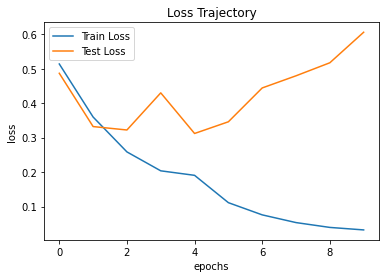

In [40]:
# plot loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Trajectory')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [55]:
# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred = np.reshape(np.where(y_train_pred > 0.5, 1, 0), y_train.shape)
y_test_pred = np.reshape(np.where(y_test_pred > 0.5, 1, 0), y_test.shape)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Train Accuracy: 0.99644
Test Accuracy: 0.87544
